# IAM 961 HW3: QR decomp

Due Monday Nov 2, 2015.

## Problem 1.
Write the following Julia functions for computing the QR decomposition of a matrix
  + `qrcgs(A)` via Classical Gram-Schmidt orthogonalization,
  + `qrmgs(A)` via Modified Gram-Schmidt orthogonalization, and
  + `qrhouse(A)` via Householder triangularization.

In [110]:
function qrcgs(A)
    # fill in
end

function qrmgs(A)
    # fill in
end

function qrhouse(A)
    # fill in
end  

qrhouse (generic function with 1 method)

## Problem 2.
Test that your QR algorithms work correctly on a fairly small and well-conditioned matrix (e.g. a 5 x 5 matrix with normally distributed elements, `A = randn(5,5)`).  You should test that $Q$ is unitary and that $QR \approx A$. Verify to your own satisfaction that $R$ is upper-triangular. Make these tests as comapct and readable as you can!

## Problem 3. 
Write a `backsub(R,b)` function that computes a solution of $Rx=b$ by backsubstitution. You can assume that $R$ is square and nonsingular. Test your backsubstitution function by solving an $Ax=b$ problem with your 5 x 5 $A$ matrix, one of your QR algorithms, and a known solution $x$. 


In [111]:
function backsub(R, b)
    # fill in
end


backsub (generic function with 1 method)

## Problem 4. 
Write a function `A = randommatrix(m,n kappa)` function that returns an m x n
random matrix with condition number kappa and exponentially graded singular values
(i.e. $\sigma_1/\sigma_m = \kappa$ and $\sigma_{j+1}/\sigma_{j} = \text{const}$). 
You can use the Matlab code at the top of pg 65 in Trefethen and Bau as a starting 
point. Test that it works by constructing a 4 x 4 matrix with kappa=10^8 and then 
computing its condition number. 

In [45]:
function randommatrix(m,n, kappa)
      (U,tmp) = qr(randn(m,n));
      (V,tmp) = qr(randn(n,n));
      Sigma = diagm(logspace(0,-log10(kappa),n));
      A = U*Sigma*V';
end

randommatrix (generic function with 1 method)

In [46]:
cond(randommatrix(4,4,1e8))

1.0000000020344907e8

## Problem 5.
Solve a large number of random $Ax=b$ problems using your QR decompositions
and `randommatrix` and `backsubstitution` functions, and produce a scatter 
plot of the normalized solution error  $\|\hat{x}-x\|/\|x\|$ versus $\kappa$. 
Plot data points from CGS in blue, MGS in red, and Householder in green.

Specifically: Construct a random $A$ matrix with $\kappa = 10^n$ where $n$ is 
a random real-valued number uniformly distributed between 0 and 16. 
Select a random $x$ vector with `x = randn(m,1)`, and then set $b = Ax$. For each of
the CGS, MGS, and Householder QR algorithms, compute the numerical solution $\hat{x}$ 
of $Ax=b$ via QR and then plot $\|\hat{x}-x\|/\|x\|$ versus $\kappa$ using log-log axes
and the color scheme specified above.  Do this for one hundred random $Ax=b$ problems and 
for a fairly small value of $m$ (perhaps 10 or 20). 

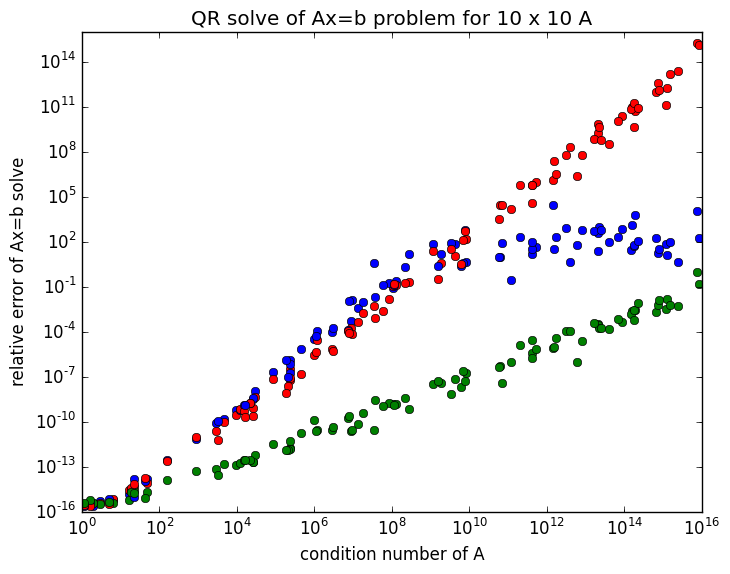

PyObject <matplotlib.text.Text object at 0x7ff130bc61d0>

In [108]:
using PyPlot
m = 10
for i = 1:100
    kappa = 10^(16*rand())
    A = randommatrix(m,m,kappa)
    x = randn(m)
    b = A*x
    
    (Q,R) = qrcgs(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "bo")
    
    (Q,R) = qrmgs(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "ro")
    
    (Q,R) = qrhouse(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "go")
end
xlabel("condition number of A")
ylabel("relative error of Ax=b solve")
title("QR solve of Ax=b problem, for $m x $m A")

## Problem 6 
Comment on your results. What can you explain about the scatter plots 
based on the algorithms and their implementation in finite-precision arithmetic?
Or, contrariwise, what can you say about the algorithms based on the scatter 
plots? 

## Problem 7
If you are curious, repeat problem 5 for a different value of $m$ 
(perhaps $m=100$). Does the dimensionality of the matrix (the value of $m$) 
make any difference?

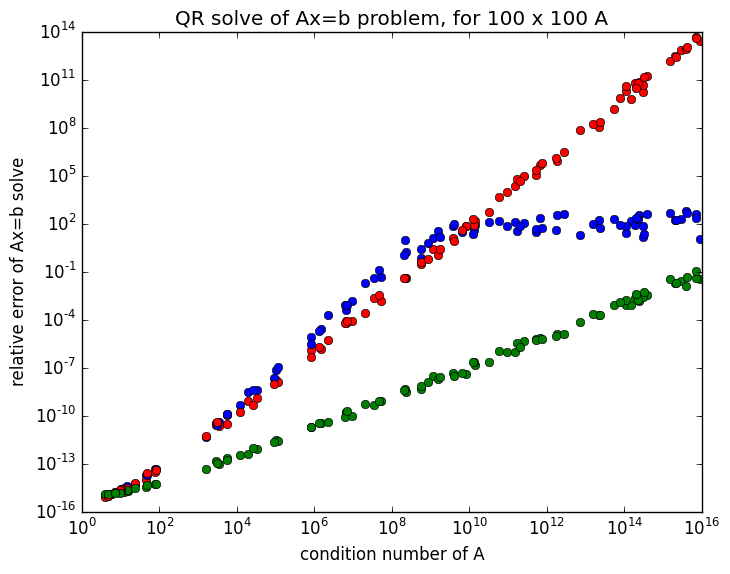

PyObject <matplotlib.text.Text object at 0x7ff1313da410>

In [109]:
using PyPlot
m = 100
for i = 1:100
    kappa = 10^(16*rand())
    A = randommatrix(m,m,kappa)
    x = randn(m)
    b = A*x
    
    (Q,R) = qrcgs(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "bo")
    
    (Q,R) = qrmgs(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "ro")
    
    (Q,R) = qrhouse(A)
    err = norm(x-backsub(R,Q'*b))/norm(x)
    loglog(kappa, err, "go")
end
xlabel("condition number of A")
ylabel("relative error of Ax=b solve")
title("QR solve of Ax=b problem, for $m x $m A")